# Data Processing
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/andrychowanda/COMP6577/blob/master/COMP6577-6.ipynb)

In [0]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [ ]:
!wget https://raw.githubusercontent.com/andrychowanda/COMP6577/master/titanic_train.csv

In [21]:
dataTitanic = pd.read_csv("titanic_train.csv")

#for i in dataTitanic:
#  print(i, dataTitanic[i].dtypes)
#  if dataTitanic[i].isna().values.any() and dataTitanic[i].dtypes != object:
#      dataTitanic[i] = dataTitanic[i].fillna(dataTitanic[i].mean())

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())

print(dataTitanic.info())
print(dataTitanic.describe())


passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 174
sibsp int64 0
parch int64 0
ticket object 0
fare float64 1
cabin object 659
embarked object 1
boat object 542
body float64 777
home.dest object 386
survived int64 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  850 non-null    int64  
 1   pclass        850 non-null    int64  
 2   name          850 non-null    object 
 3   sex           850 non-null    object 
 4   age           676 non-null    float64
 5   sibsp         850 non-null    int64  
 6   parch         850 non-null    int64  
 7   ticket        850 non-null    object 
 8   fare          849 non-null    float64
 9   cabin         191 non-null    object 
 10  embarked      849 non-null    object 
 11  boat          308 non-null    object 
 12  body          73 non-null     float64
 13  h

In [22]:
dataTitanic["survived"].value_counts()

0    537
1    313
Name: survived, dtype: int64

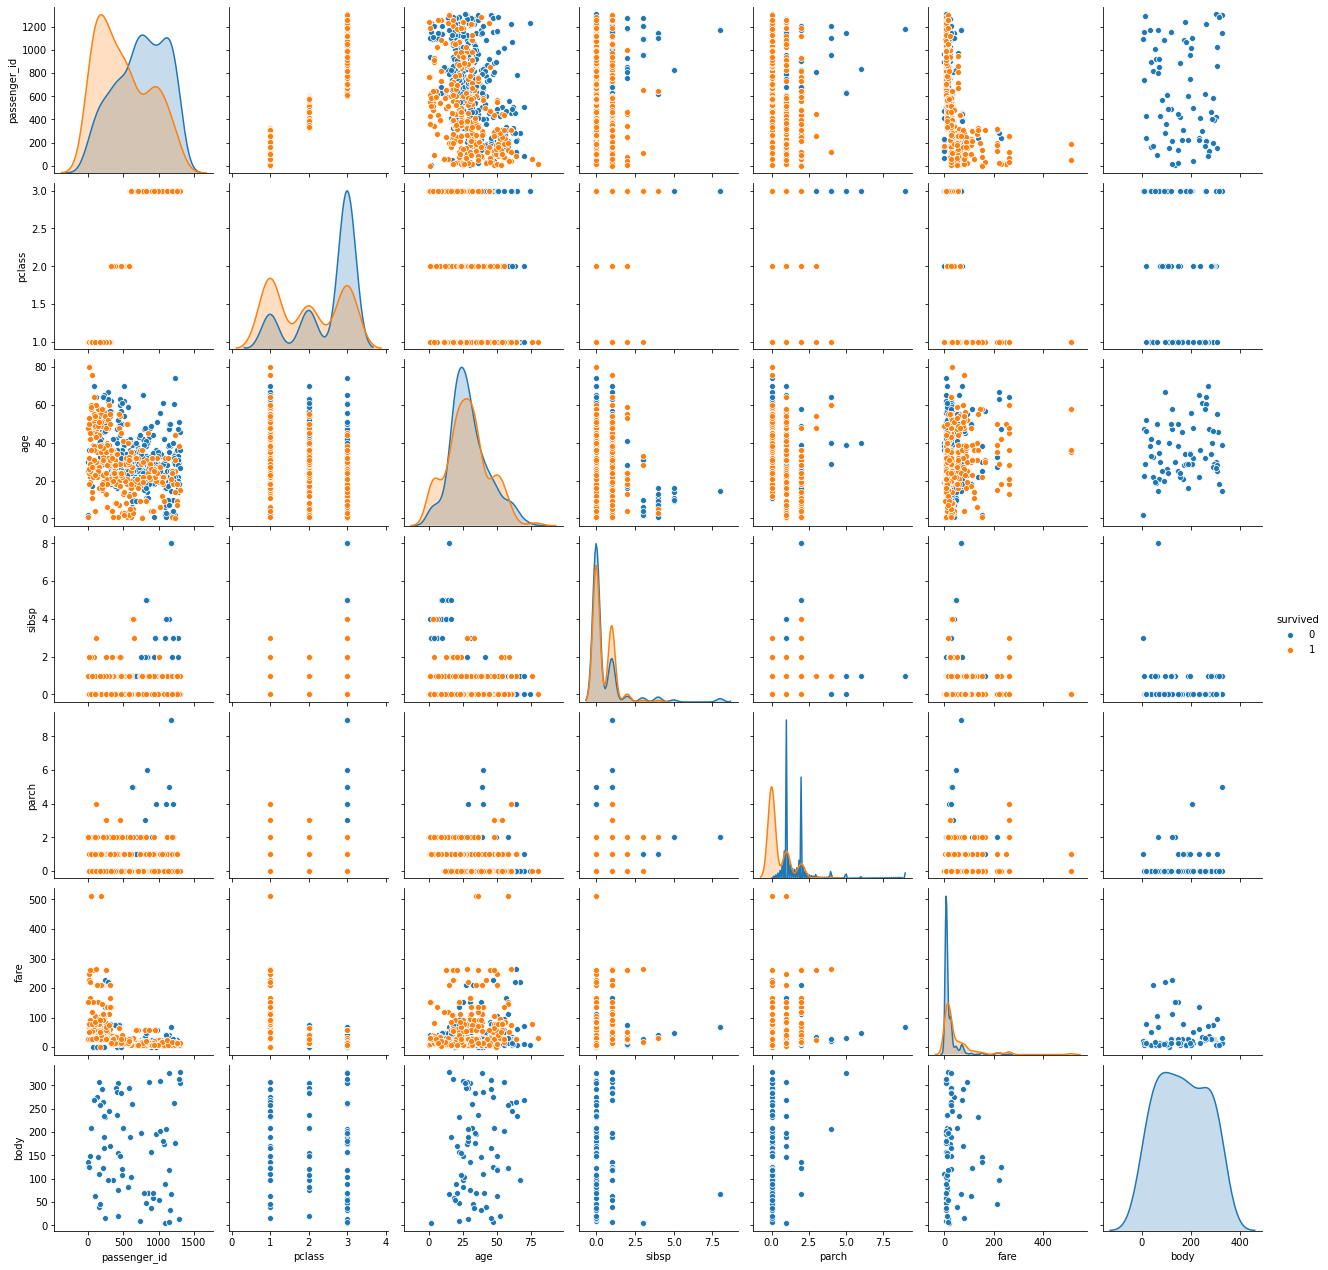

In [23]:
sb.pairplot(dataTitanic, hue="survived");
plt.rcParams["figure.figsize"] = [16,9]
plt.show()

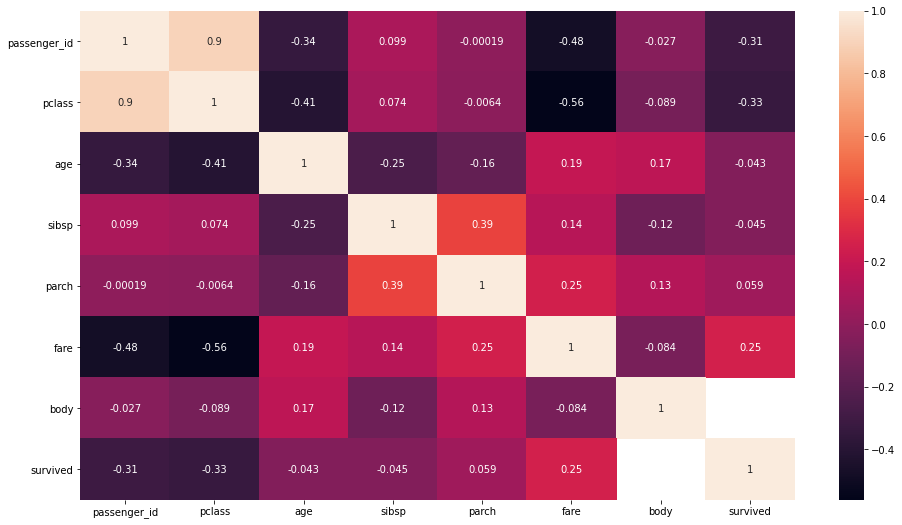

In [24]:
# missing values - age
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.rcParams["figure.figsize"] = [16,9]
plt.show()
#dataTitanic["age"] = dataTitanic.groupby(["pclass"])["age"].transform("mean")
dataTitanic["age"] = dataTitanic.groupby(["pclass"])["age"].apply(lambda x: x.fillna(x.median()))

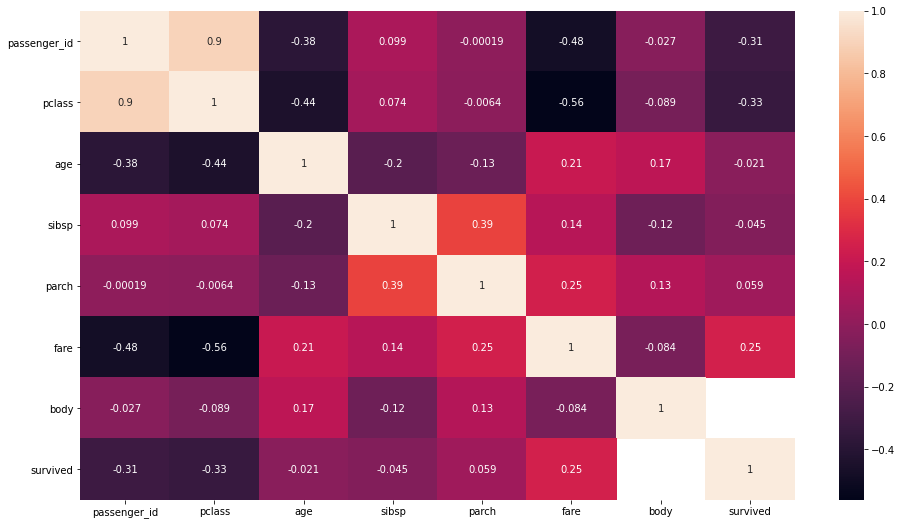

In [25]:
# missing values - fare
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()
#dataTitanic["fare"] = dataTitanic.groupby(["pclass"])["fare"].transform("mean")
dataTitanic["fare"] = dataTitanic.groupby(["pclass"])["fare"].apply(lambda x: x.fillna(x.median()))

In [26]:
# missing values - cabin
dataTitanic["cabin"] = dataTitanic["cabin"].fillna('U')
print(dataTitanic["cabin"])

0        U
1        U
2        U
3        U
4        U
      ... 
845    C39
846    B37
847      U
848      U
849      U
Name: cabin, Length: 850, dtype: object


In [27]:
# missing values - embarked 
print(dataTitanic[dataTitanic['embarked'].isnull()])
dataTitanic['embarked'] = dataTitanic['embarked'].fillna('S')

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


     passenger_id  pclass                 name  ... body  home.dest  survived
109           168       1  Icard, Miss. Amelie  ...  NaN        NaN         1

[1 rows x 15 columns]
passenger_id int64 0
pclass int64 0
name object 0
sex object 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin object 0
embarked object 0
boat object 542
body float64 777
home.dest object 386
survived int64 0


In [28]:
# transform - cabin
print(dataTitanic["cabin"])
dataTitanic["cabin"] = dataTitanic["cabin"].map(lambda x: x[0])
print(dataTitanic["cabin"])


0        U
1        U
2        U
3        U
4        U
      ... 
845    C39
846    B37
847      U
848      U
849      U
Name: cabin, Length: 850, dtype: object
0      U
1      U
2      U
3      U
4      U
      ..
845    C
846    B
847    U
848    U
849    U
Name: cabin, Length: 850, dtype: object


In [0]:
# new column - Family Size
dataTitanic["famsize"] = dataTitanic["parch"] + dataTitanic["sibsp"] + 1

In [30]:
# convert nominal

encode = preprocessing.LabelEncoder()
dataTitanic["sex"] = encode.fit_transform(dataTitanic["sex"])
dataTitanic["embarked"] = encode.fit_transform(dataTitanic["embarked"])
dataTitanic["cabin"] = encode.fit_transform(dataTitanic["cabin"])

for i in dataTitanic:
  print(i, dataTitanic[i].dtypes, dataTitanic[i].isna().sum())


passenger_id int64 0
pclass int64 0
name object 0
sex int64 0
age float64 0
sibsp int64 0
parch int64 0
ticket object 0
fare float64 0
cabin int64 0
embarked int64 0
boat object 542
body float64 777
home.dest object 386
survived int64 0
famsize int64 0


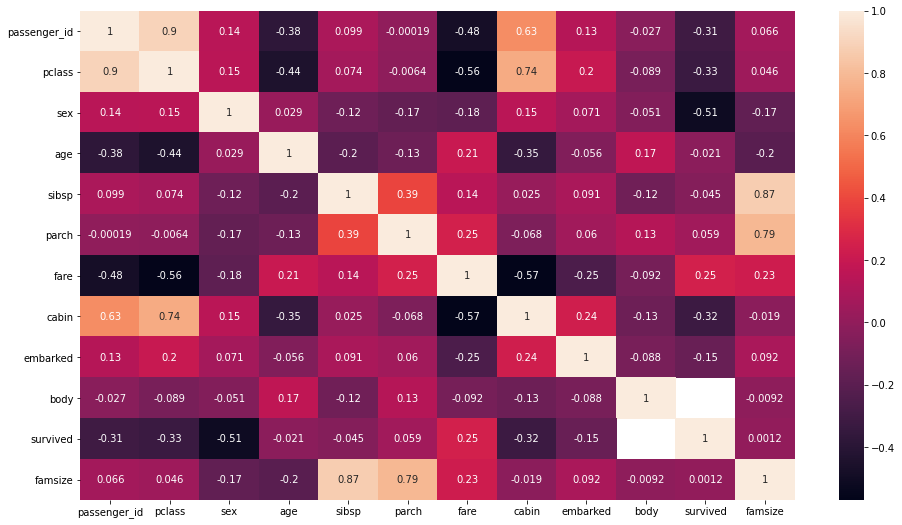

In [31]:
corr_matrix = dataTitanic.corr()
sb.heatmap(data = corr_matrix, annot = True)
plt.show()

X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)


# KNN

In [57]:
KNN = KNeighborsClassifier(n_neighbors = 3).fit(XTrain, YTrain)
CTest  = KNN.predict(XTest)
CTrain  = KNN.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))


Train set acc:  0.8794117647058823
Test set acc:  0.7176470588235294


In [55]:
Ks = 30
accTrain = np.zeros((Ks-1))
accTest = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1, Ks):    
    KNN = KNeighborsClassifier(n_neighbors = n).fit(XTrain, YTrain)
    CTest  = KNN.predict(XTest)
    CTrain  = KNN.predict(XTrain)
    accTrain[n - 1] = metrics.accuracy_score(YTrain, CTrain)
    accTest[n - 1] = metrics.accuracy_score(YTest, CTest)
    
print("Best  ACC Training : %.2f" % accTrain.max(), ", with k = ", accTrain.argmax() + 1)
print("Best  ACC Testing : %.2f" % accTest.max(), ", with k = ", accTest.argmax() + 1)



Best  ACC Training : 0.88 , with k =  1
Best  ACC Testing : 0.72 , with k =  1


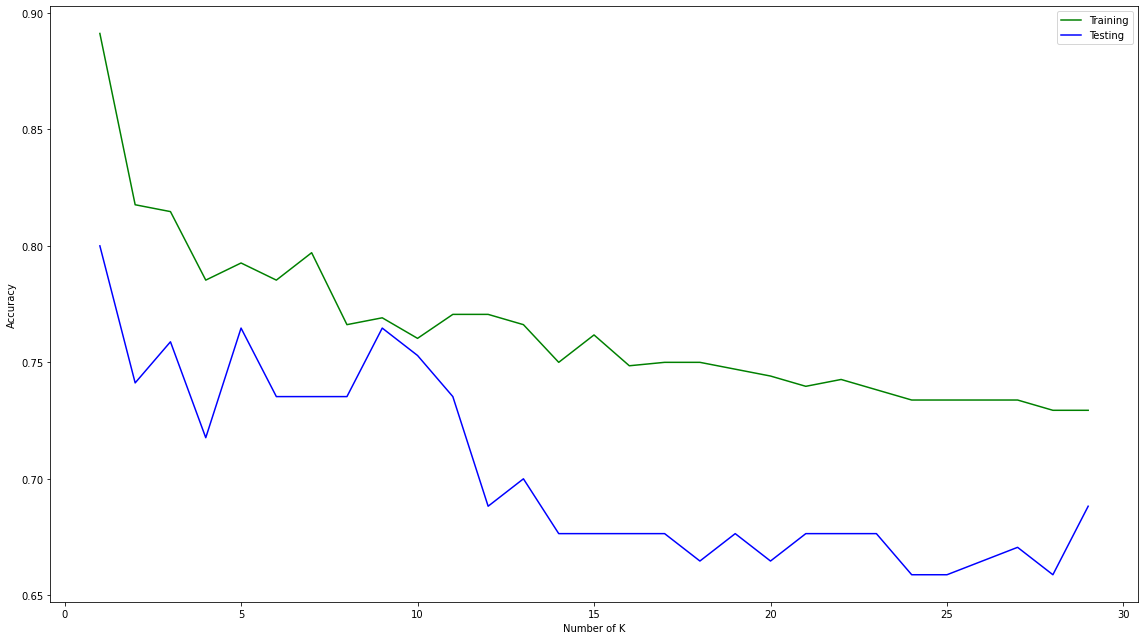

In [34]:
plt.plot(range(1,Ks), accTrain,"g")
plt.plot(range(1,Ks), accTest,"b")
plt.legend(("Training", "Testing"))
plt.ylabel("Accuracy")
plt.xlabel("Number of K")
plt.tight_layout()
plt.show()

# Logistic Regression

In [35]:
LGR = LogisticRegression().fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7823529411764706
Test set acc:  0.7588235294117647


Train set acc:  0.9732142857142857
Test set acc:  0.9736842105263158


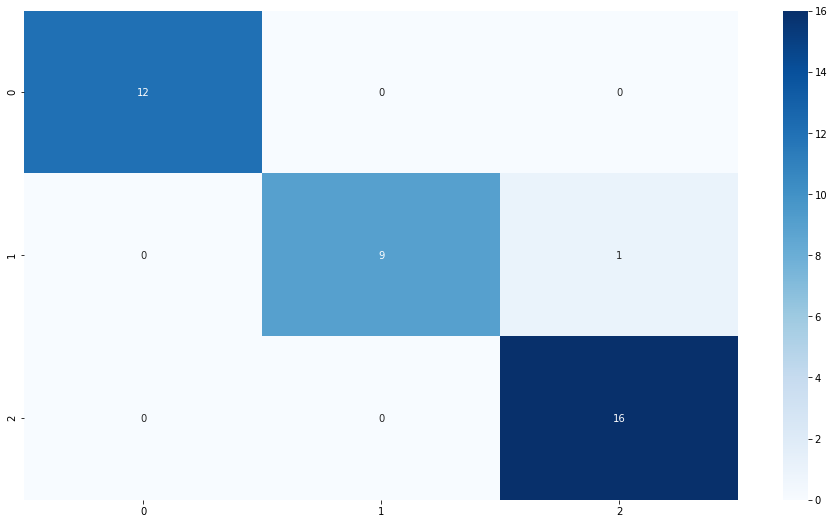

In [36]:
irisData = pd.read_csv("iris.csv")
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
LGR = LogisticRegression(max_iter=10000).fit(XTrain, YTrain)
CTest  = LGR.predict(XTest)
CTrain  = LGR.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# SVM

In [37]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.7279411764705882
Test set acc:  0.6882352941176471


Train set acc:  0.9821428571428571
Test set acc:  0.9736842105263158


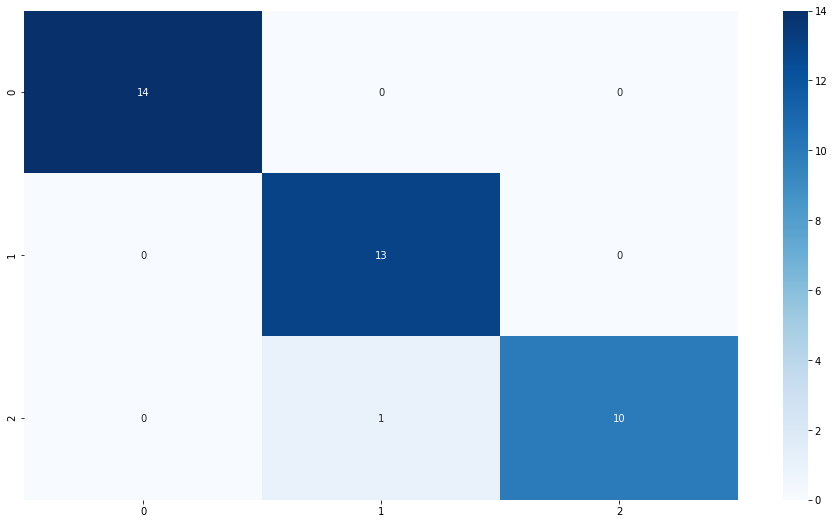

In [38]:
X = irisData[["sepal_length", "sepal_width", "petal_length", "petal_width"]]
Y = irisData["species"]
XTrain, XTest, YTrain, YTest = train_test_split(X, Y)
SVM = SVC().fit(XTrain, YTrain)
CTest  = SVM.predict(XTest)
CTrain  = SVM.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))
cf_matrix = metrics.confusion_matrix(YTest, CTest)
sb.heatmap(cf_matrix, cmap="Blues", annot=True)
plt.show()

# Decision Tree

In [54]:
X = dataTitanic[["pclass", "sex", "age", "cabin"]]
Y = dataTitanic["survived"]

XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size=0.2)

DST = DecisionTreeClassifier(criterion="gini").fit(XTrain, YTrain)
CTest  = DST.predict(XTest)
CTrain  = DST.predict(XTrain)
print("Train set acc: ", metrics.accuracy_score(YTrain, CTrain))
print("Test set acc: ", metrics.accuracy_score(YTest, CTest))

Train set acc:  0.8926470588235295
Test set acc:  0.7352941176470589


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


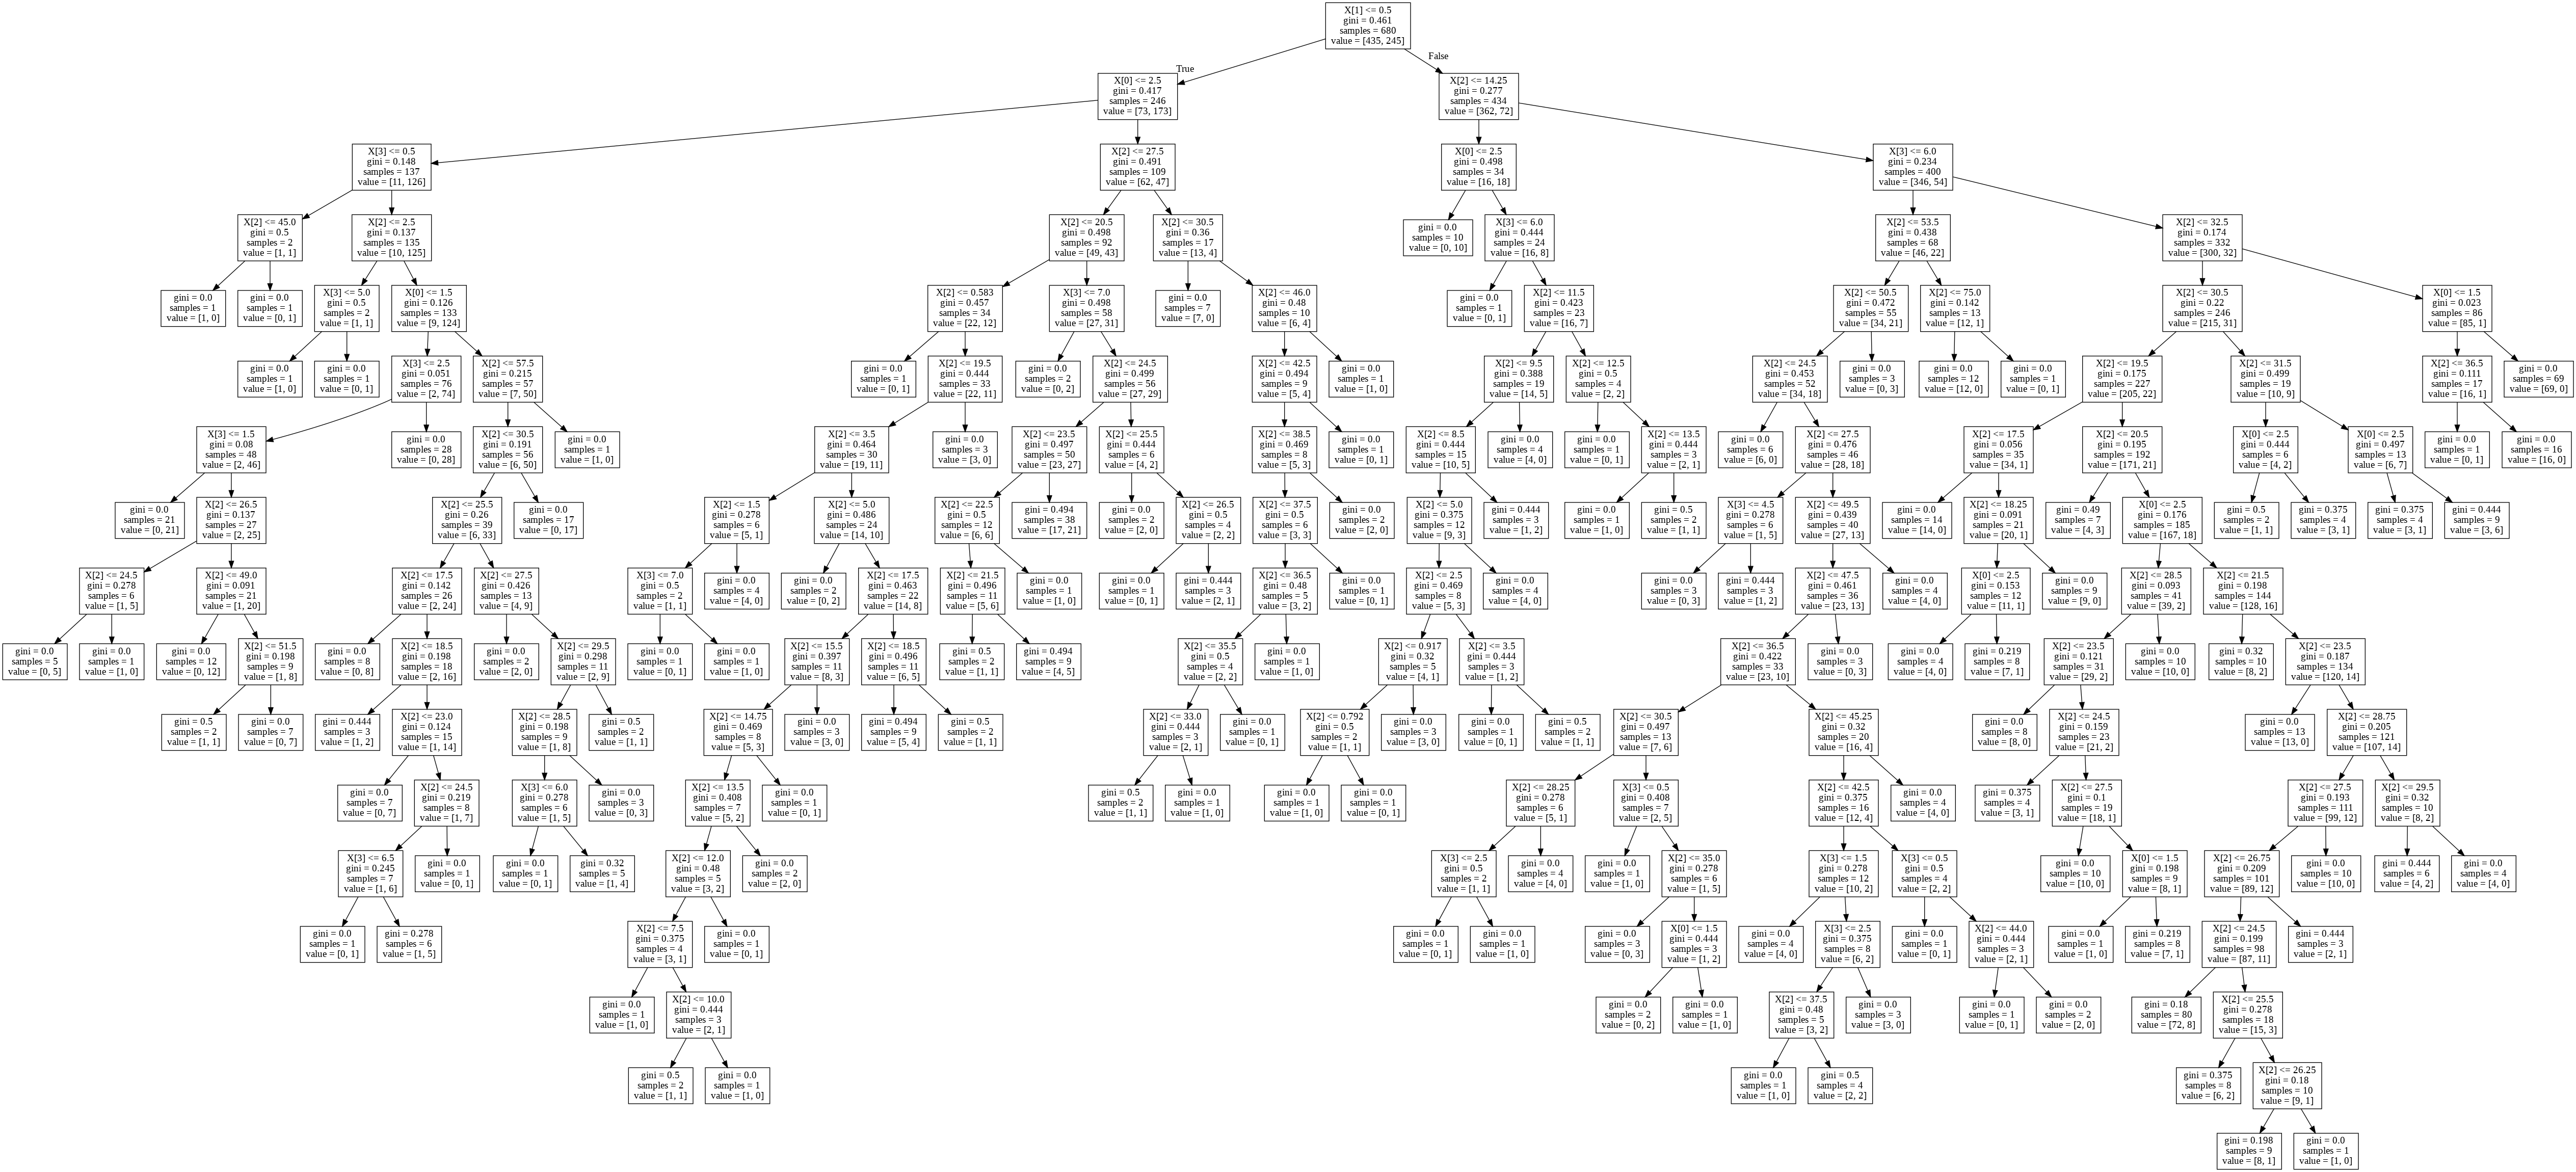

In [40]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

output = StringIO()
export_graphviz(DST, out_file = output)
graph = pydotplus.graph_from_dot_data(output.getvalue())  
Image(graph.create_png())

# Simple Data Resampling

In [66]:
nNot, nSurvived = dataTitanic["survived"].value_counts()
dataSurvived = dataTitanic[dataTitanic["survived"] == 1]
dataNot = dataTitanic[dataTitanic["survived"] == 0]

dataNot = dataNot.sample(nSurvived)
dataTitanicUResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicUResampled["survived"].value_counts())
print(dataTitanicUResampled.info())
print(dataTitanicUResampled.describe())

1    313
0    313
Name: survived, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 626 entries, 559 to 847
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  626 non-null    int64  
 1   pclass        626 non-null    int64  
 2   name          626 non-null    object 
 3   sex           626 non-null    int64  
 4   age           626 non-null    float64
 5   sibsp         626 non-null    int64  
 6   parch         626 non-null    int64  
 7   ticket        626 non-null    object 
 8   fare          626 non-null    float64
 9   cabin         626 non-null    int64  
 10  embarked      626 non-null    int64  
 11  boat          303 non-null    object 
 12  body          41 non-null     float64
 13  home.dest     355 non-null    object 
 14  survived      626 non-null    int64  
 15  famsize       626 non-null    int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 83.1+ KB
None
    

In [68]:

dataSurvived = dataSurvived.sample(nNot, replace=True)
dataTitanicOResampled = pd.concat([dataNot, dataSurvived], axis=0)

print(dataTitanicOResampled["survived"].value_counts())
print(dataTitanicOResampled.info())
print(dataTitanicOResampled.describe())

1    537
0    537
Name: survived, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1074 entries, 1 to 519
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   passenger_id  1074 non-null   int64  
 1   pclass        1074 non-null   int64  
 2   name          1074 non-null   object 
 3   sex           1074 non-null   int64  
 4   age           1074 non-null   float64
 5   sibsp         1074 non-null   int64  
 6   parch         1074 non-null   int64  
 7   ticket        1074 non-null   object 
 8   fare          1074 non-null   float64
 9   cabin         1074 non-null   int64  
 10  embarked      1074 non-null   int64  
 11  boat          525 non-null    object 
 12  body          73 non-null     float64
 13  home.dest     608 non-null    object 
 14  survived      1074 non-null   int64  
 15  famsize       1074 non-null   int64  
dtypes: float64(3), int64(9), object(4)
memory usage: 142.6+ KB
None
    

In [70]:
XU = dataTitanicUResampled[["pclass", "sex", "age", "cabin"]]
YU = dataTitanicUResampled["survived"]

XO = dataTitanicOResampled[["pclass", "sex", "age", "cabin"]]
YO = dataTitanicOResampled["survived"]

XUTrain, XUTest, YUTrain, YUTest = train_test_split(XU, YU, test_size=0.2)
XOTrain, XOTest, YOTrain, YOTest = train_test_split(XO, YO, test_size=0.2)

DSTU = DecisionTreeClassifier(criterion="gini").fit(XUTrain, YUTrain)
DSTO = DecisionTreeClassifier(criterion="gini").fit(XOTrain, YOTrain)

CUTest  = DSTU.predict(XUTest)
COTest  = DSTO.predict(XOTest)

CUTrain  = DSTU.predict(XUTrain)
COTrain  = DSTO.predict(XOTrain)

print("Train set under acc: ", metrics.accuracy_score(YUTrain, CUTrain))
print("Test set under acc: ", metrics.accuracy_score(YUTest, CUTest))

print("Train set over acc: ", metrics.accuracy_score(YOTrain, COTrain))
print("Test set over acc: ", metrics.accuracy_score(YOTest, COTest))


Train set under acc:  0.886
Test set under acc:  0.7857142857142857
Train set over acc:  0.9010477299185099
Test set over acc:  0.8790697674418605
